In [2]:
import pandas as pd
df = pd.read_excel('inputsV2.xlsx')
df.head()

,Body,Sentiment,Quality
0,The women's health portion isn't accurate. I a...,negative,Functional Suitability
1,All is good but it doesn't have Indian food ty...,negative,Functional Suitability
2,It counts steps when we are in vehicle,negative,Functional Suitability
3,The app and service is great,positive,Functional Suitability
4,It is not recording at all,negative,Functional Suitability


In [3]:
import string
df["clean"]=""
for index,line in df["Body"].iteritems():
    df["clean"][index]="".join(u.lower() for u in line if u not in string.punctuation )

In [4]:
import nltk
wn =nltk.WordNetLemmatizer()
#from nltk.stem import PorterStemmer
#porter=PorterStemmer()
from nltk.tokenize import  word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(wn.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [5]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
df["stemmed"]=""
for index ,line in df["clean"].iteritems():
    df["stemmed"][index]= "".join(stemSentence(line)  )

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tf_vec = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= tf_vec.fit_transform(df['stemmed'])
print(text_counts.shape)

(1693, 2823)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Quality'], test_size=0.20, random_state=2)

In [24]:
print(X_train.shape) 
print(y_train.shape) 
print(y_test.shape) 
print(X_test.shape) 

(1354, 2823)
(1354,)
(339,)
(339, 2823)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
count = df['Quality'].value_counts() 
print(count) 

Functional Suitability    601
Usability                 496
Security                  198
Performance               159
Compatibility             123
Maintainability            78
Reliability                32
Portability                 6
Name: Quality, dtype: int64


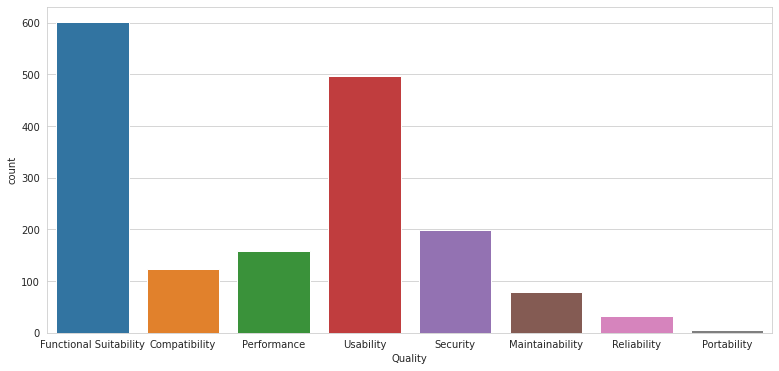

In [27]:
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
ax = sns.countplot(x="Quality", data=df)

In [28]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6755162241887905


In [29]:
kappa_val = cohen_kappa_score(y_test, predicted, weights='quadratic')
print('%.2f' % kappa_val)

0.69


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train, y_train)

predicted= model.predict(X_test)
print("KNN Accuracy:",metrics.accuracy_score(y_test, predicted))

KNN Accuracy: 0.7050147492625368


In [31]:
kappa_val = cohen_kappa_score(y_test, predicted, weights='quadratic')
print('%.2f' % kappa_val)

0.61


In [32]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("svm Accuracy:",metrics.accuracy_score(y_test, predicted))

svm Accuracy: 0.7345132743362832


In [33]:
kappa_val = cohen_kappa_score(y_test, predicted, weights='quadratic')
print('%.2f' % kappa_val)

0.74


In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

                        precision    recall  f1-score   support

         Compatibility       0.90      0.39      0.55        23
Functional Suitability       0.60      1.00      0.75       129
       Maintainability       1.00      0.27      0.42        15
           Performance       0.93      0.37      0.53        35
           Portability       0.00      0.00      0.00         1
           Reliability       1.00      0.12      0.22         8
              Security       0.94      0.55      0.69        31
             Usability       0.97      0.78      0.87        97

              accuracy                           0.73       339
             macro avg       0.79      0.44      0.50       339
          weighted avg       0.82      0.73      0.71       339



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
conf_matrix = confusion_matrix(y_test, predicted)
print(conf_matrix)

[[  9  14   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0]
 [  0  11   4   0   0   0   0   0]
 [  0  20   0  13   0   0   1   1]
 [  0   1   0   0   0   0   0   0]
 [  1   6   0   0   0   1   0   0]
 [  0  13   0   0   0   0  17   1]
 [  0  20   0   1   0   0   0  76]]


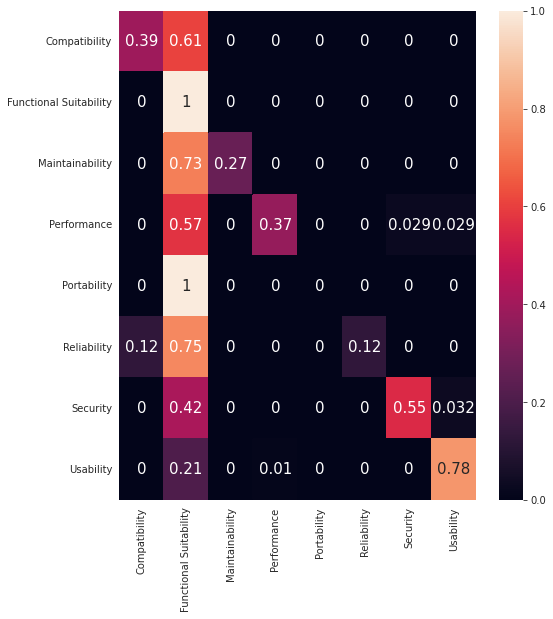

In [37]:
import numpy as np
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = pd.DataFrame(conf_matrix, index = ['Compatibility','Functional Suitability','Maintainability', 'Performance', 'Portability', 'Reliability', 'Security', 'Usability'], columns = ['Compatibility','Functional Suitability','Maintainability', 'Performance', 'Portability', 'Reliability', 'Security', 'Usability'])
plt.figure(figsize = (8,9))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [83]:
from sklearn.linear_model import SGDClassifier
SGDClassifier(max_iter=7)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=7)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8259587020648967


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [84]:
kappa_val = cohen_kappa_score(y_test, predicted, weights='quadratic')
print('%.2f' % kappa_val)

0.74


In [85]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

         Compatibility       0.73      0.70      0.71        23
Functional Suitability       0.77      0.91      0.83       129
       Maintainability       0.73      0.73      0.73        15
           Performance       0.92      0.69      0.79        35
           Portability       0.00      0.00      0.00         1
           Reliability       1.00      0.50      0.67         8
              Security       0.85      0.74      0.79        31
             Usability       0.91      0.88      0.89        97

              accuracy                           0.83       339
             macro avg       0.74      0.64      0.68       339
          weighted avg       0.83      0.83      0.82       339



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix , auc,roc_curve,roc_auc_score

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 16   6   0   0   0   0   0   1]
 [  3 117   3   0   0   0   2   4]
 [  1   1  11   1   0   0   0   1]
 [  0   8   0  24   0   0   2   1]
 [  0   1   0   0   0   0   0   0]
 [  2   2   0   0   0   4   0   0]
 [  0   7   0   0   0   0  23   1]
 [  0  10   1   1   0   0   0  85]]


In [88]:
import numpy as np

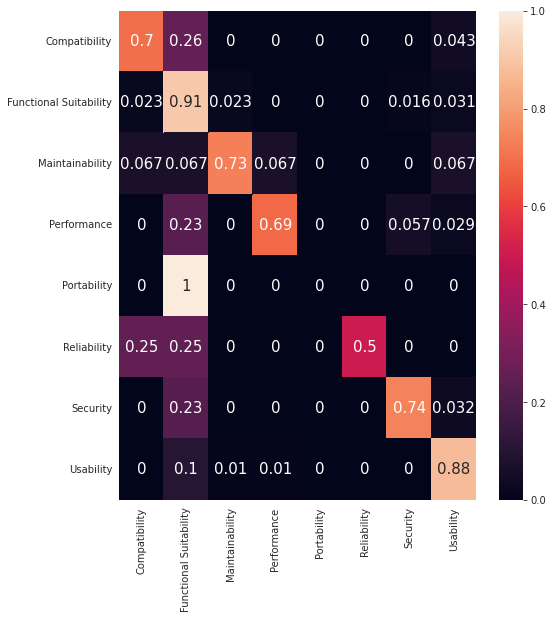

In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = pd.DataFrame(conf_matrix, index = ['Compatibility','Functional Suitability','Maintainability', 'Performance', 'Portability', 'Reliability', 'Security', 'Usability'], columns = ['Compatibility','Functional Suitability','Maintainability', 'Performance', 'Portability', 'Reliability', 'Security', 'Usability'])
plt.figure(figsize = (8,9))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
#At last, we need to make prediction. It can be done with the help of following script −

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 15   6   0   0   0   0   1   1]
 [  1 123   0   1   0   0   2   2]
 [  0   4  10   0   0   0   0   1]
 [  0  10   0  18   0   0   4   3]
 [  1   0   0   0   0   0   0   0]
 [  1   2   0   0   0   2   2   1]
 [  0   5   0   1   0   0  24   1]
 [  1  12   0   3   0   0   1  80]]
Classification Report:
                        precision    recall  f1-score   support

         Compatibility       0.79      0.65      0.71        23
Functional Suitability       0.76      0.95      0.85       129
       Maintainability       1.00      0.67      0.80        15
           Performance       0.78      0.51      0.62        35
           Portability       0.00      0.00      0.00         1
           Reliability       1.00      0.25      0.40         8
              Security       0.71      0.77      0.74        31
             Usability       0.90      0.82      0.86        97

              accuracy                           0.80       339
             macro avg       0.74   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
kappa_val = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print('%.2f' % kappa_val)

0.78


In [104]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

#from sklearn import metrics
#print(metrics.classification_report(y_test, y_pred_1))

Confusion Matrix:
[[16  3  0  0  0  0  3  1]
 [ 3 97  2  5  0  0 15  7]
 [ 0  3 11  0  0  0  1  0]
 [ 0  8  0 20  0  0  3  4]
 [ 0  0  0  0  1  0  0  0]
 [ 2  2  0  1  0  2  0  1]
 [ 0  5  0  0  0  0 24  2]
 [ 1  9  0  5  0  0  2 80]]
Classification Report:
                        precision    recall  f1-score   support

         Compatibility       0.73      0.70      0.71        23
Functional Suitability       0.76      0.75      0.76       129
       Maintainability       0.85      0.73      0.79        15
           Performance       0.65      0.57      0.61        35
           Portability       1.00      1.00      1.00         1
           Reliability       1.00      0.25      0.40         8
              Security       0.50      0.77      0.61        31
             Usability       0.84      0.82      0.83        97

              accuracy                           0.74       339
             macro avg       0.79      0.70      0.71       339
          weighted avg       0.76   

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
kappa_val = cohen_kappa_score(y_test, y_pred_1, weights='quadratic')
print('%.2f' % kappa_val)

0.68
